### Importing Libaries

In [1]:
# !python -m pip install --upgrade pip
# !pip install numpy --upgrade
# !pip install pandas --upgrade
# !pip install seaborn --upgrade
# !pip install matplotlib --upgrade
# !pip install scikit-learn --upgrade

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### Data Analysis

In [4]:
df=pd.read_csv("HousingData.csv")

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
df.shape

(506, 14)

In [7]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [10]:
df["CRIM"].fillna(df["CRIM"].mode()[0], inplace=True)
df["ZN"].fillna(df["ZN"].mode()[0], inplace=True)
df["INDUS"].fillna(df["INDUS"].mode()[0], inplace=True)
df["CHAS"].fillna(df["CHAS"].mode()[0], inplace=True)
df["AGE"].fillna(df["AGE"].mode()[0], inplace=True)
df["LSTAT"].fillna(df["LSTAT"].mode()[0], inplace=True)

In [11]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### EDA

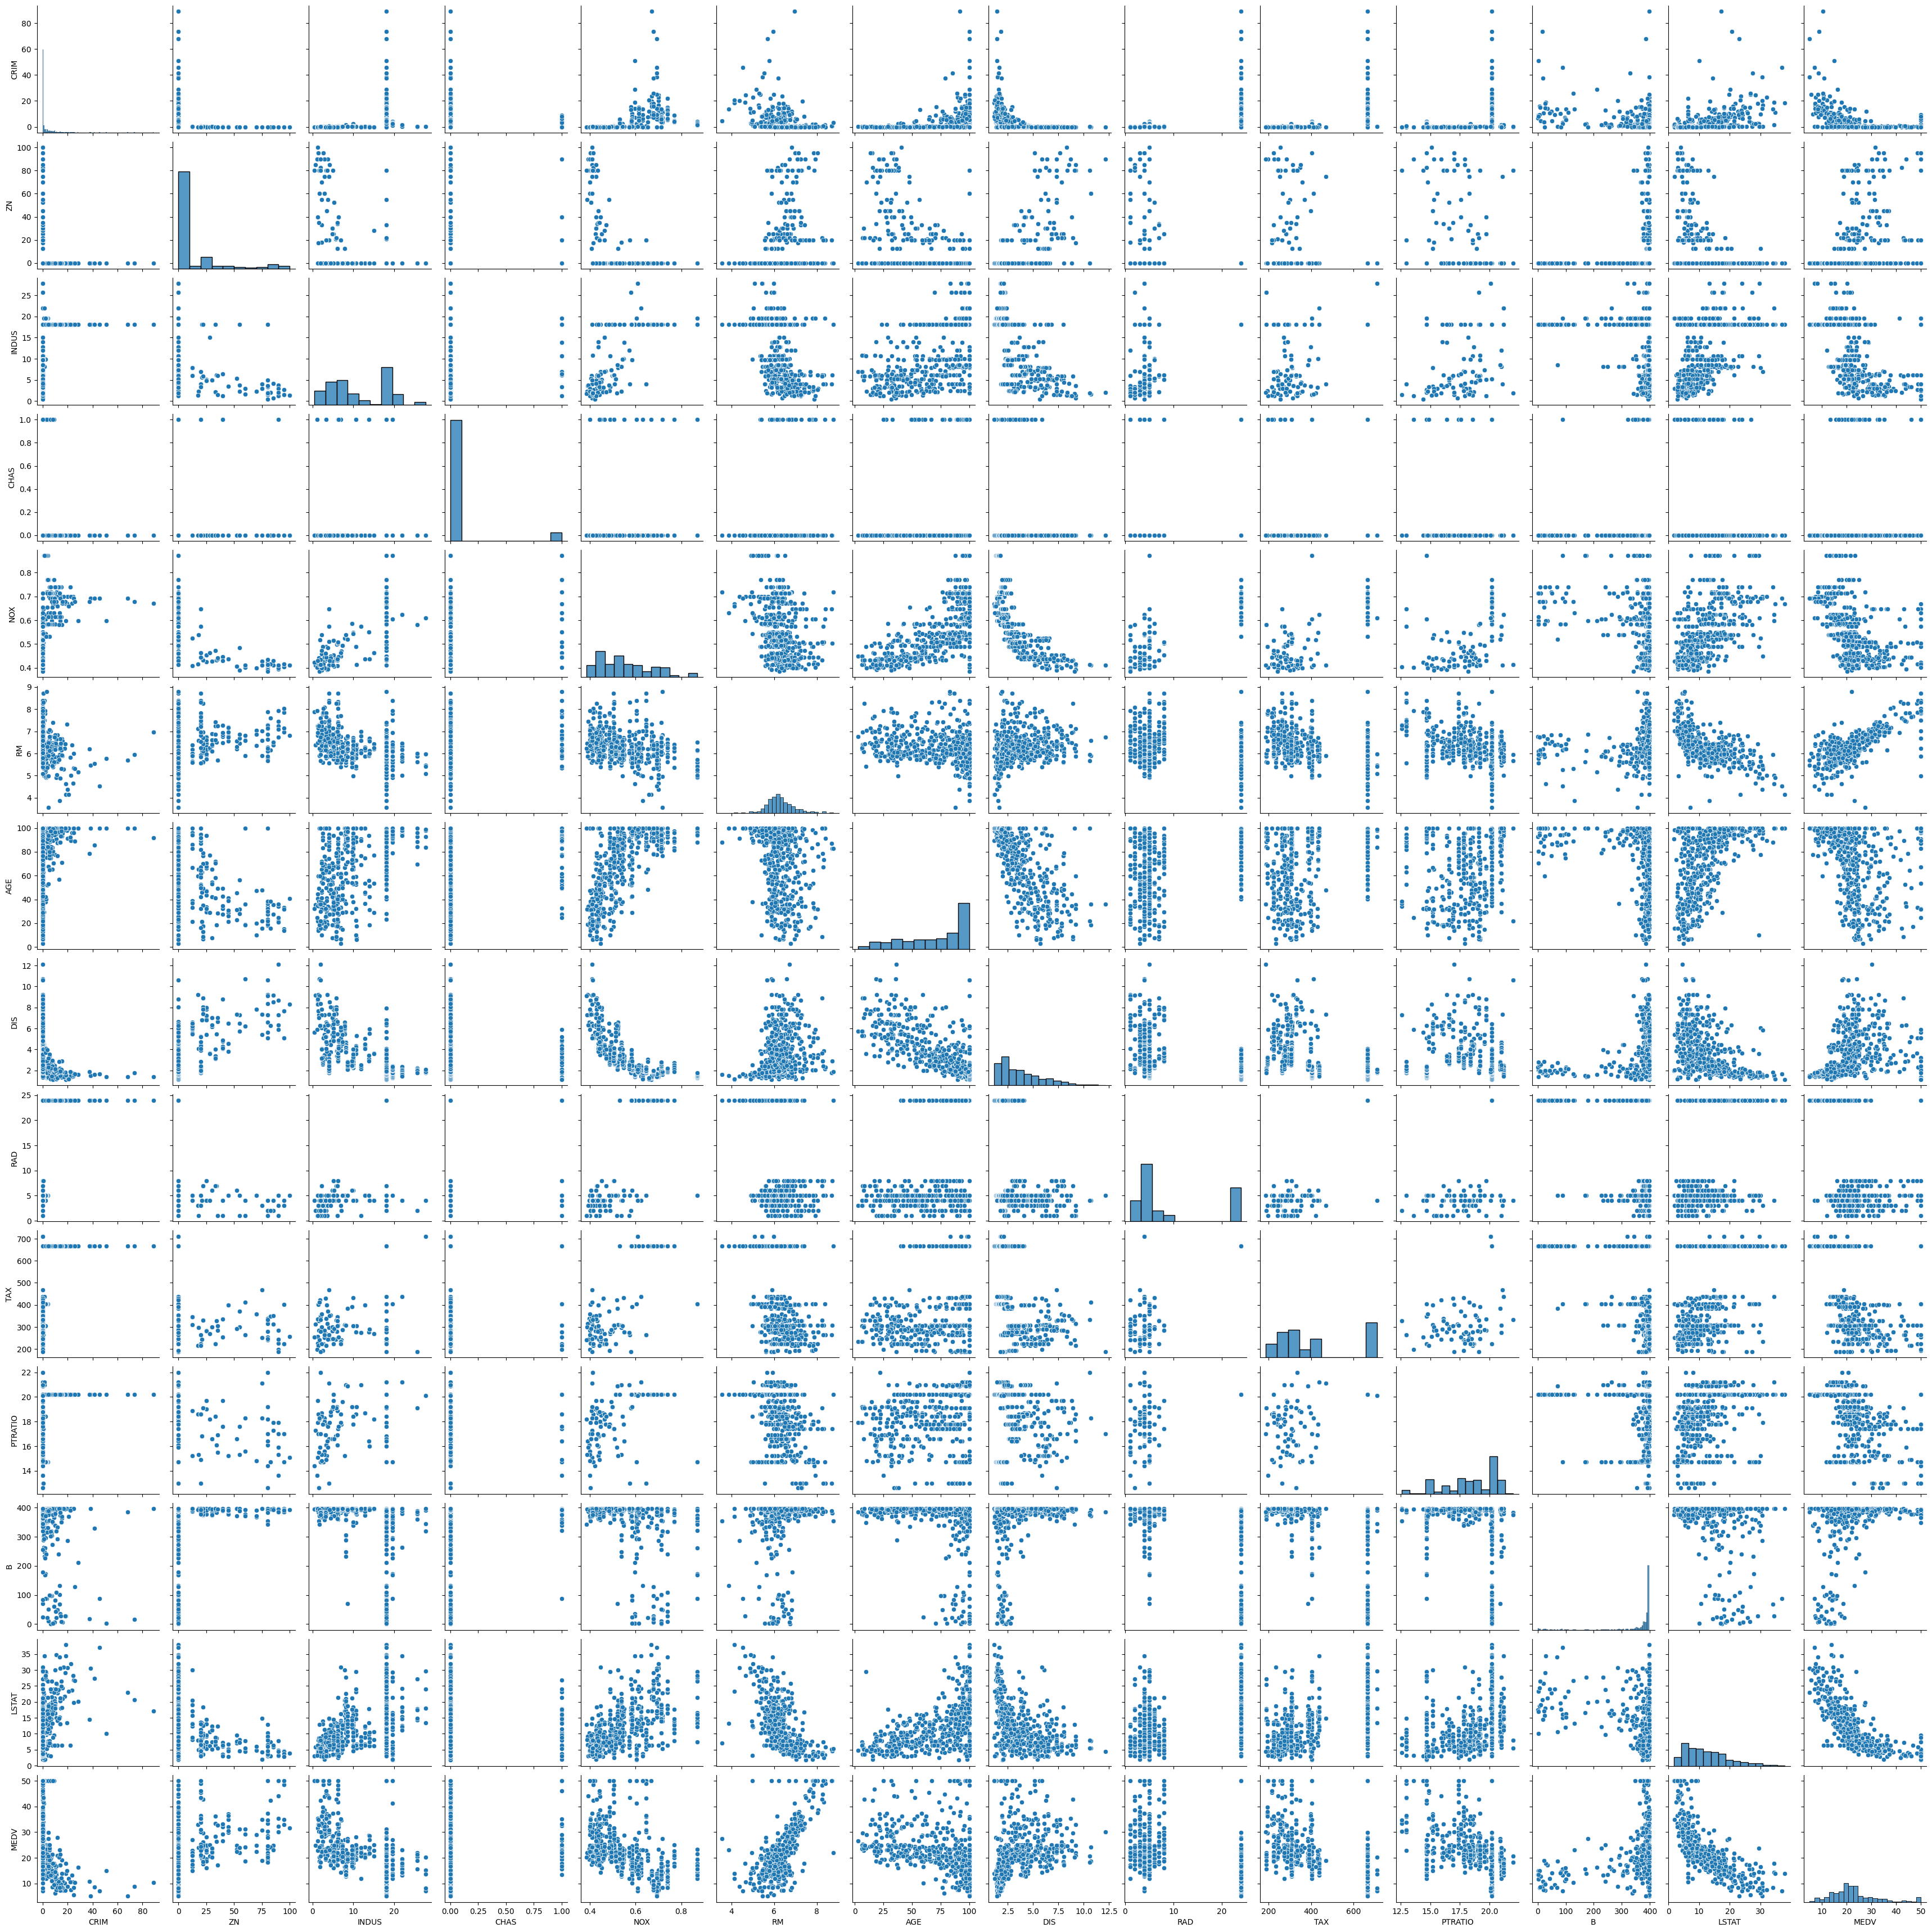

In [12]:
sns.pairplot(df)

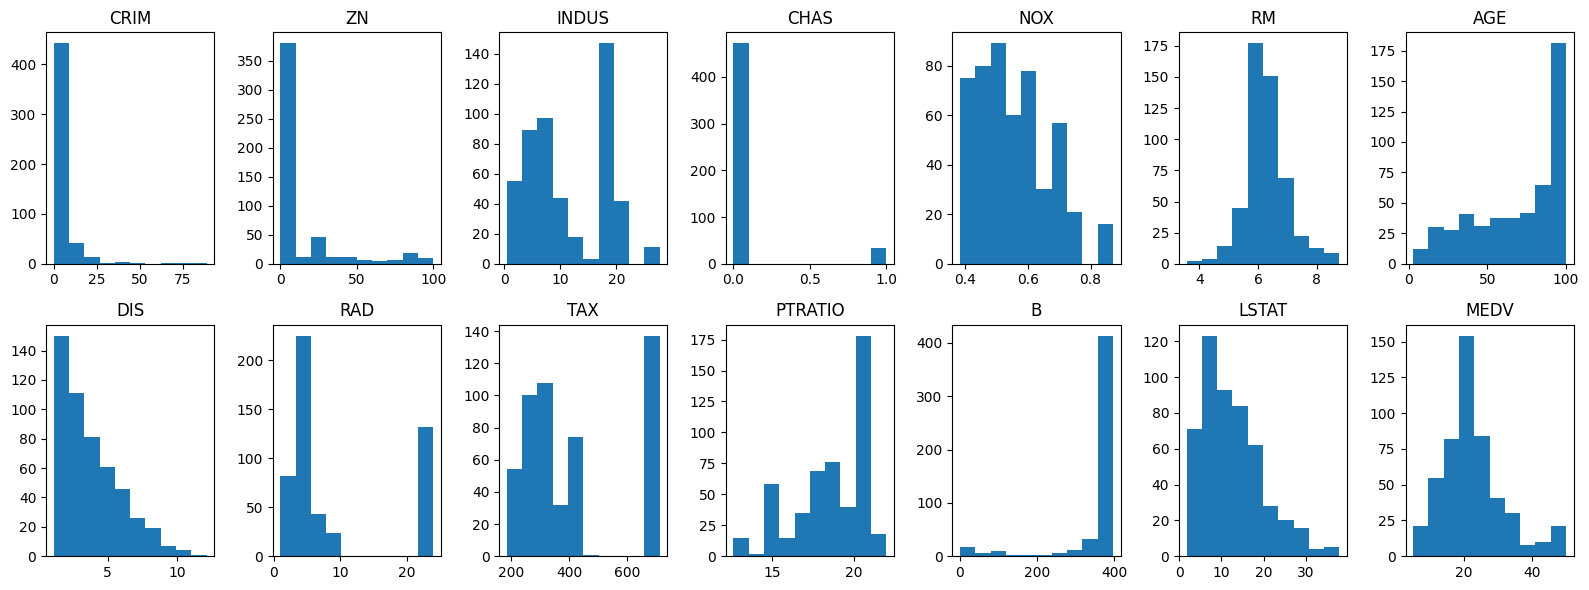

In [13]:
rows =2
cols =7
fig,ax =plt.subplots(nrows=rows ,ncols=cols, figsize=(16,6))
col=df.columns
index=0
for i in range(rows):
    for j in range(cols):
        ax[i][j].hist(df[col[index]])
        ax[i][j].set_title(col[index])
        index=index+1
plt.tight_layout()
plt.show()

In [14]:
corrmat=df.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.185547,0.379754,-0.055705,0.410921,-0.220323,0.329308,-0.365909,0.600548,0.559916,0.278227,-0.364913,0.430490,-0.384108
ZN,-0.185547,1.000000,-0.497913,-0.032992,-0.498619,0.312295,-0.527256,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.385937,0.362292
INDUS,0.379754,-0.497913,1.000000,0.050288,0.735691,-0.389362,0.610734,-0.687672,0.580946,0.697661,0.372694,-0.344783,0.566693,-0.478199
CHAS,-0.055705,-0.032992,0.050288,1.000000,0.070867,0.106797,0.077579,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.044653,0.183844
NOX,0.410921,-0.498619,0.735691,0.070867,1.000000,-0.302188,0.700357,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.568643,-0.427321
RM,-0.220323,0.312295,-0.389362,0.106797,-0.302188,1.000000,-0.230265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602263,0.695360
AGE,0.329308,-0.527256,0.610734,0.077579,0.700357,-0.230265,1.000000,-0.711525,0.431239,0.483619,0.254734,-0.270793,0.561439,-0.363636
DIS,-0.365909,0.632428,-0.687672,-0.092318,-0.769230,0.205246,-0.711525,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.476652,0.249929
RAD,0.600548,-0.300061,0.580946,-0.003339,0.611441,-0.209847,0.431239,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.459460,-0.381626
TAX,0.559916,-0.304385,0.697661,-0.035822,0.668023,-0.292048,0.483619,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.516273,-0.468536


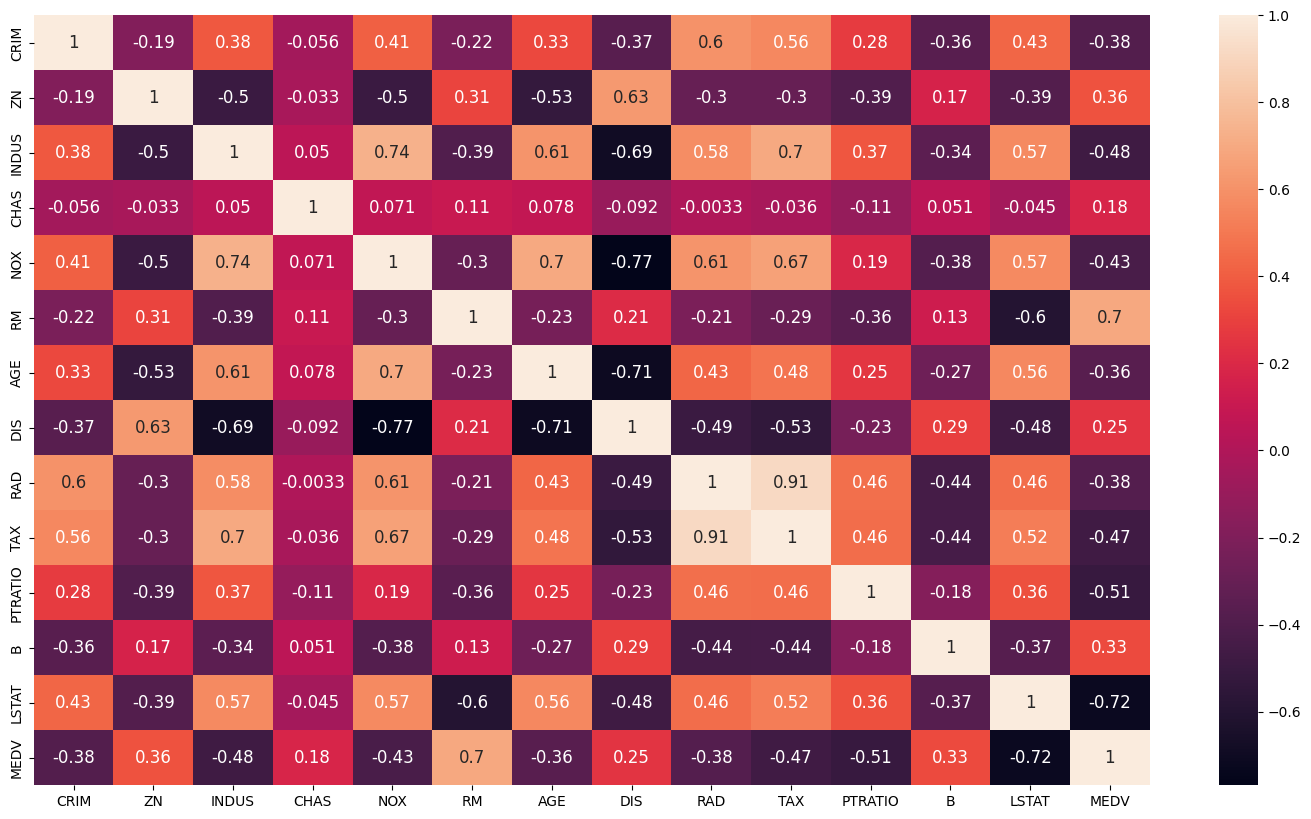

In [15]:
plt.subplots(figsize=(18,10))
sns.heatmap(corrmat,annot=True,annot_kws={'size':12})
plt.show()

### Train Test Split and Model Training

In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,6.36,36.2


In [17]:
x=df.drop(['MEDV'],axis=1)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,6.36


In [18]:
y=df['MEDV']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [21]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [22]:
y_predict=model.predict(x_test)

In [23]:
y_predict,y_test

(array([25.25974801, 22.71697378, 29.215158  , 11.44341222, 21.4872208 ,
        19.08325851, 19.74823863, 21.2425848 , 18.63356348, 20.12238883,
         4.46615086, 16.42329604, 16.77583582,  5.26443279, 39.67598414,
        32.77816644, 21.70555053, 37.14996759, 30.77893977, 23.00344796,
        24.62097245, 24.16519128, 20.69531395, 30.18181839, 22.35262351,
         9.01593761, 17.72298578, 18.06881935, 35.78171677, 21.21951171,
        17.86395737, 17.22123722, 20.06205242, 24.24447226, 28.44652107,
        19.04114893, 11.06371421, 23.88629488, 18.4773559 , 15.51097096,
        25.93609535, 21.07318899, 22.751556  , 15.02751605, 23.6350849 ,
        25.16440819, 20.00878322, 23.12588447, 10.37623328, 24.27909481,
        21.24023478, 17.66885657, 24.4542985 , 30.32595582, 13.24501277,
        22.07029477, 21.08943718, 16.02859443, 12.77788066, 22.70199808,
        18.16338511, 21.63183327, 31.38789645, 30.83270983, 17.04059547,
        32.76400539, 18.45936568, 20.47049241, 20.7

### How to evaluate the regression model performance

In [24]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_predict)

0.5774748192443915

In [25]:
mean_absolute_error(y_test,y_predict)

3.8953805927150924

In [26]:
mean_squared_error(y_test,y_predict)

34.40556593327604

In [27]:
np.sqrt(mean_squared_error(y_test,y_predict))

5.865625792127899

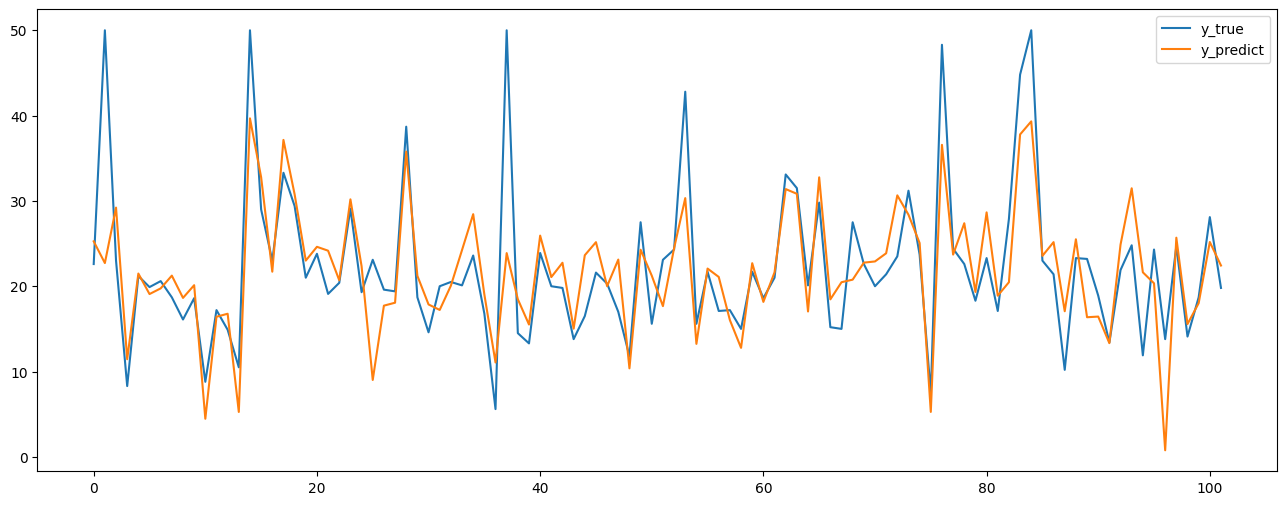

In [28]:
plt.subplots(figsize=(16,6))
x_points =list(range(len(y_test)))
plt.plot(x_points,y_test,label='y_true')
plt.plot(x_points,y_predict,label='y_predict')
plt.legend()
plt.show()

### Learning curves

In [32]:
from sklearn.model_selection import learning_curve,ShuffleSplit

In [41]:
def plot_learning_curve(estimator,title,x,y,ylim=None,cv=None,
                       train_size=np.linspace(0.1,1,10)):
    plt.figure()
    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel("Score")
    
    train_sizes,train_scores,test_scores=learning_curve(estimator,x,y,cv=cv,train_sizes=train_size)
    
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,
                     train_scores_mean+train_scores_std,alpha=0.1,color='red')
    plt.fill_between(train_sizes,test_scores_mean-test_scores_std,
                     test_scores_mean+test_scores_std,alpha=0.1,color='green')
    plt.plot(train_sizes,train_scores_mean,'o-',color='red',label='traning score')
    plt.plot(train_sizes,test_scores_mean,'o-',color='green',label='test score')
    plt.legend(loc='best')
    return plt

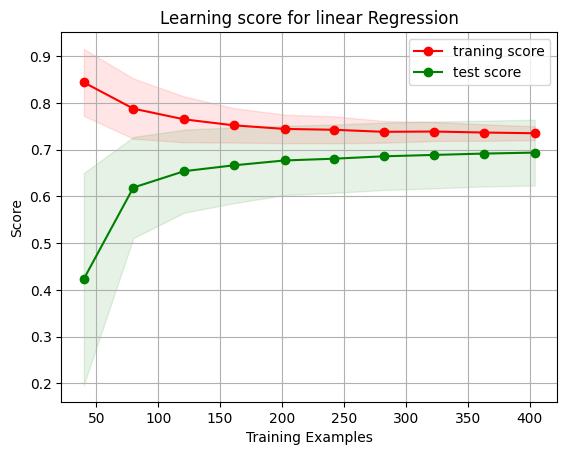

In [42]:
title='Learning score for linear Regression'
# cv--cross validitation
cv=ShuffleSplit(n_splits=100,random_state=0,test_size=0.2)
model==LinearRegression()
plot_learning_curve(model,title,x,y,ylim=(0.7,1.01),cv=cv)
plt.show()

### Machine Learning Interpretability

#### Residuals Plot

In [44]:
# !pip install -U yellowbrick

In [45]:
from yellowbrick.regressor import ResidualsPlot

C:\Users\DINESH\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


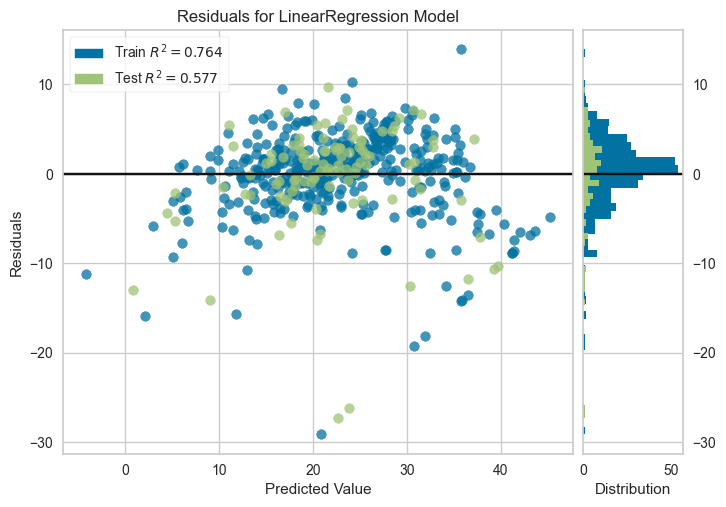

In [46]:
viz=ResidualsPlot(model)
viz.fit(x_train,y_train)
viz.score(x_test,y_test)
viz.show()
plt.show()

In [47]:
from yellowbrick.regressor import PredictionError

C:\Users\DINESH\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


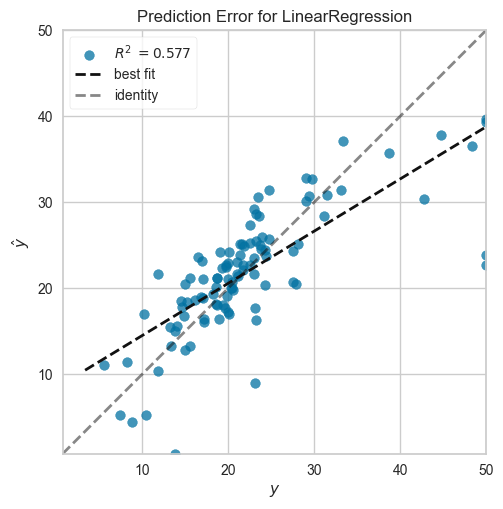

In [48]:
viz=PredictionError(model)
viz.fit(x_train,y_train)
viz.score(x_test,y_test)
viz.show()
plt.show()